# 다중회귀(Multiple Regression)
## 특성이 2개면
- '타깃 = a X 특성1 + b X 특성2 + 절편'은 평면이된다.

## 특성을 3개로 만들면?
- '농어길이 X 농어높이' 를 새로운 특성으로 만든다. --> 특성공학

## csv 파일 -> 판다스 데이터프레임(pd.read_csv()) -> 넘파이 배열(to_numpy())
- 판다스 데이터프레임을 넘파이 배열로 만드는 과정

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# perch_full 과 perch_weight 데이터들을 훈련세트와 테스트 세트로 나눈다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 자동으로 절편을 추가하므로 굳이 필요가없다.
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [5]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [6]:
poly.get_feature_names()
# x0 : 1번째 특성을의미, x0^2 : 1번째 특성의 제곱, x0 x1 : 1번째특성과 2번째 특성의

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [7]:
test_poly = poly.transform(test_input)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594155


In [9]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [10]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))

0.9999999999938143


In [12]:
print(lr.score(test_poly, test_target))
# 특성의 개수를 크게 늘리면 선형 모델은 강력해지지만, 훈련세트에 과대적합되므로 테스트 세트에서는 점수가 형편없다.

-144.40744533753661


# 규제(Regularization)
### 모델이 훈련세트에 과대적합되지 않도록 만드는 것
선형 회귀 모델에서는 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

규제를 적용하기 전에 먼저 정규화를 해야한다.
### StandardScaler 클래스를 이용하여 정규

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

훈련세트에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 mean_, scale_ 속성에 저장된다.
특성마다 계산하므로 55개의 평균과 표준편차가 들어있다.

선형회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부른다.

### 릿지
- 계수를 제곱한 값을 기준으로 규제 적용

### 라쏘
- 계수의 절대값을 기준으로 규제 적용

## 릿지 회귀

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [15]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다.

모델 객체를 만들 때 alpha 매개변수로 규제의 강도조절

alpha값이 크면 규제강도가 세지므로 계수값을 줄이고 과소적합되도록 유도

alpha값이 작으면 규제강도가 약해져 계수값 줄이는 역할이 줄어들어 선형회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

** alpha값은 사전에 사람이 지정해야한다. == 하이퍼파라미터라고 부른다.

적절한 alpha값을 찾는 한가지 방법은 alpha값에 대한 R^2값의 그래프를 그려보는것

### matplotlib을 통한 alpha값에 대한 R^2그래프

In [16]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [17]:
# alpha값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련하고 훈련세트와 테트 세트의 점수를 파이썬 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾼다.

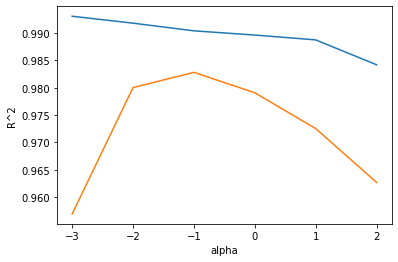

In [18]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

그래프에서 보면 알 수 있듯 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 log10(-1)부분 즉, 0.1이다.

alpha값을 0.1로 하여 최종 모델 훈련

In [19]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386984


### 라쏘 회귀

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [21]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


라쏘회귀도 똑같이 alpha값을 바꿔가면서 점수 계산

In [23]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)

    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/yonghyunpark/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957794062, tolerance: 518.2793833333334
  positive)
/Users/yonghyunpark/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401813, tolerance: 518.2793833333334
  positive)


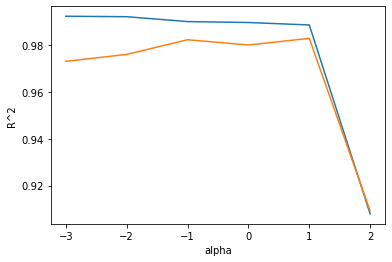

In [24]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

라쏘 모델에서는 최적 alpha값은 1, 즉 10^1 = 10

In [25]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


### 라쏘 모델은 계수 값을 아예 0으로 만들 수 있는데 그 계수들은 coef_ 속성에 저장되어 있다.
### 0인것을 세보면

In [27]:
print(np.sum(lasso.coef_==0))
# np.sum()함수는 배열을 모두 더한 값을 반환한다.
# 넘파이 배열에 비교연산자를 사용했을 때 np.sum()함수에서는 True를 1로 False를 0으로 인식하여 덧셈을 하기 때문에 마치 비교연산자에 맞는 원소 개수를 세는 효과
# 여기서는 계수값 0을 찾으라고 햇으므로 40개가 있다는 것을 알 수 있다.

40
